In [1]:
# prompt: zaimportuj pakiety: numpy, pandas,matplotlib,tesorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# prompt: z pakietu tesnsorflow zaimportuj keras i layers

from tensorflow import keras
from tensorflow.keras import layers


In [5]:
# prompt: załaduj za pomocą pandas zbiór danych pima-indians-diabetes

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['pregnance', 'glocose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'class']
df = pd.read_csv(url, names=names)

In [6]:
print(df.head())

   pregnance  glocose  bp  skin  insulin   bmi  pedigree  age  class
0          6      148  72    35        0  33.6     0.627   50      1
1          1       85  66    29        0  26.6     0.351   31      0
2          8      183  64     0        0  23.3     0.672   32      1
3          1       89  66    23       94  28.1     0.167   21      0
4          0      137  40    35      168  43.1     2.288   33      1


In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
EPOCHS = 50
BATCH_SIZE = 16
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5401 - loss: 0.7029 - val_accuracy: 0.6423 - val_loss: 0.6825
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.6383 - val_accuracy: 0.6341 - val_loss: 0.6474
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 0.5899 - val_accuracy: 0.6179 - val_loss: 0.6191
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5716 - val_accuracy: 0.6504 - val_loss: 0.5944
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.5257 - val_accuracy: 0.6585 - val_loss: 0.5728
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.5225 - val_accuracy: 0.6911 - val_loss: 0.5542
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.4900 - val_accuracy: 0.6911 - val_loss: 0.5422
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5022 - val_accuracy: 0.6911 - val_loss

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5468 
Test accuracy: 0.7467532753944397


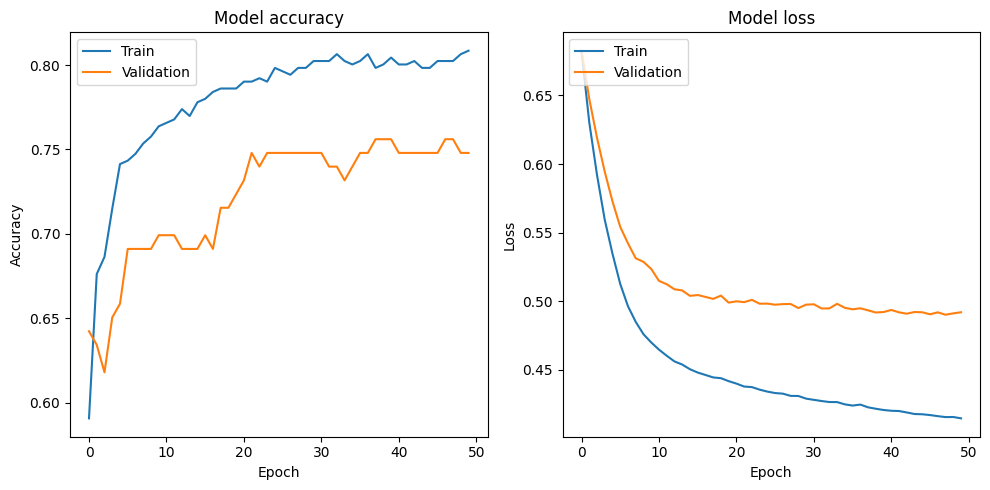

In [13]:
# prompt: przeprowadź wizulizację wyków treningu dla danych treningowych i walidacyjnych

import matplotlib.pyplot as plt

# Assuming 'history' object from model.fit() is available

plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()